In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import HARPS_utils as Hu
sd = Hu.test_2d()

Found 45 e2ds files in directory /Data/HARPS_Grenoble/AU_Mic/DRS_spectra
Will look for blaze files in directory /Data/HARPS_Grenoble/AU_Mic/DRS_spectra
Processing e2ds file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2003-12-13T00-24-50.450_e2ds_A.fits.
Blaze file name in headeris HARPS.2003-12-12T21:42:45.093_blaze_A.fits
Found blaze file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2003-12-12T21?42?45.093_blaze_A.fits.
Processing e2ds file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2004-06-01T09-21-32.253_e2ds_A.fits.
Blaze file name in headeris HARPS.2004-05-31T21:54:04.588_blaze_A.fits
Found blaze file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2004-05-31T21?54?04.588_blaze_A.fits.
Processing e2ds file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2004-07-15T07-30-38.982_e2ds_A.fits.
Blaze file name in headeris HARPS.2004-07-14T21:38:56.983_blaze_A.fits
Found blaze file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2004-07-14T21?38?56.983_blaze_A.fits.
Processing e2ds file

Blaze file name in headeris HARPS.2016-07-20T21:18:47.435_blaze_A.fits
Found blaze file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2016-07-20T21?18?47.435_blaze_A.fits.
Processing e2ds file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2016-07-21T04-58-51.443_e2ds_A.fits.
Blaze file name in headeris HARPS.2016-07-20T21:18:47.435_blaze_A.fits
Found blaze file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2016-07-20T21?18?47.435_blaze_A.fits.
Processing e2ds file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2017-05-31T07-11-10.106_e2ds_A.fits.
Blaze file name in headeris HARPS.2017-05-30T18:58:25.729_blaze_A.fits
Found blaze file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2017-05-30T18?58?25.729_blaze_A.fits.
Processing e2ds file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2017-05-31T07-26-41.738_e2ds_A.fits.
Blaze file name in headeris HARPS.2017-05-30T18:58:25.729_blaze_A.fits
Found blaze file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2017-05-30T18?58?25.729_blaze_A.fits.


Reading spectrum 37 from file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2017-10-09T00-38-58.226_e2ds_A.fits
Reading spectrum 38 from file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2017-10-10T23-34-53.639_e2ds_A.fits
Reading spectrum 39 from file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2017-10-10T23-50-25.261_e2ds_A.fits
Reading spectrum 40 from file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2018-03-29T08_44_26.753_e2ds_A.fits
Reading spectrum 41 from file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2018-03-29T08_59_57.464_e2ds_A.fits
Reading spectrum 42 from file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2018-03-30T09_12_59.029_e2ds_A.fits
Reading spectrum 43 from file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2018-03-30T09_28_30.541_e2ds_A.fits
Reading spectrum 44 from file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2018-03-31T09_02_29.762_e2ds_A.fits
Reading spectrum 45 from file /Data/HARPS_Grenoble/AU_Mic/DRS_spectra/HARPS.2018-03-31T09_18_00.434_e2ds

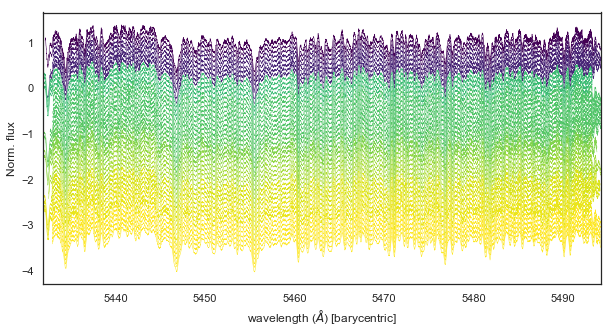

In [6]:
order = 48
snr_min = 30
Hu.plot_2d(sd, snr_range = [snr_min, 10000], orders = [order])

Extract arrays

In [7]:
wav = sd["wav_bary"]
flux =  sd["flux_norm"]
snr = sd['snr']
bjd = sd['bjd']
baryvel = sd['baryvel']
l = snr >= snr_min
bjd = bjd[l]
baryvel = baryvel[l]
snr = snr[l]
wav = wav[l, order, :]
flux = flux[l, order, :]

Construct reference (mean) spectrum
















In [ ]:
wmin, wmax = 5725, 5735
l = (wav[0,:] >= wmin) * (wav[0,:] <= wmax)
wav = wav[:,l]
flux = flux[:,l]

In [ ]:
K, N = wav.shape
lwav = np.log(wav * 1e-10) # wavelengths are in Angstrom
lwmin,lwmax = lwav.min(),lwav.max()
x = np.linspace(0,100,10000)
ys = np.zeros((K,len(x)))
xmin = 0
xmax = 100
for k in range(K):
    yc = flux[k,:]-1
    lwc = lwav[k,:]
    xc = 100*(lwc-lwmin)/(lwmax-lwmin)
    xmin = max(xmin, xc.min())
    xmax = min(xmax, xc.max())
    g = interp1d(xc,yc,bounds_error=False,fill_value=0)
    ys[k,:] = g(x)
l = (x >= xmin) * (x <= xmax)
x = x[l]
ys = ys[:,l]

Do the fit

In [ ]:
w = fit_deriv(x, ys, 4)

In [ ]:
print(w.T)

In [ ]:
from george import kernels, GP
from scipy.optimize import minimize
def fit_deriv_GP(x, ys, B):
    K,N = ys.shape
    fig, axes = plt.subplots(3, 1, sharex = True, figsize=(10,10))
    basis = np.ones((B,N))
    yc = ys[0,:]
#    xmin, xmax = x.min(), x.max()
#    x100 = (x - xmin) / (xmax - xmin)
#    k = 1.0 * kernels.Matern52Kernel(1.0)
#    gp = GP(k)
#    p2p = np.median(abs(yc[1:]-yc[:-1]))
#    gp.compute(x100[::10], yerr = p2p)
#    def nll(p):
#        gp.set_parameter_vector(p)
#        try:
#            gp.compute(x100[::10],yerr=p2p)
#        except:
#            return 1e20
#        return -gp.log_likelihood(yc[::10])
#    p0 = gp.get_parameter_vector()
#    soln = minimize(nll,p0)
#    print(soln.x)
#    gp.set_parameter_vector(soln.x)
#    gp.compute(x100,yerr=p2p)
#    ym = gp.predict(yc, x100,return_cov=False,return_var=False)
    ym = ys.mean(axis=0)
    dx = x[1] - x[0]
    basis[0,:] = ym[:]
    for b in range(B-1):
        dy = yc[1:] - yc[:-1]
        g = interp1d(x[:-1]+0.5*dx,dy,bounds_error=False,fill_value=0)
        yc = g(x)
        m = abs(yc).max()
        basis[b+1,:] = yc/m
    ws = np.zeros((B,K))
    for k in range(K):
        yc = ys[k,:]
        axes[0].plot(x, yc, 'k-',lw=0.5,alpha=0.5)
        axes[1].plot(x, yc - ys[0,:],'k-',lw=0.5,alpha=0.5)
        w = fit_basis(yc.reshape((1,N)), basis)
        ws[:,k] = w
        corr = apply_basis(w, basis).flatten()
        axes[0].plot(x, corr,'r-',lw=0.5,alpha=0.5)
        axes[1].plot(x, corr - ys[0,:],'r-',lw=0.5,alpha=0.5)
        axes[2].plot(x, yc-corr,'k-',lw=0.5,alpha=0.5)
    return ws    


In [ ]:
w = fit_deriv_GP(x, ys, 2)